In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import imread
import seaborn as sns
%matplotlib inline

# 1D convolutions

In [2]:
t = np.arange(0, 4 * np.pi, 0.01)

In [3]:
x = np.sin(t)
x[x<0] = 0
x[x>0] = 1

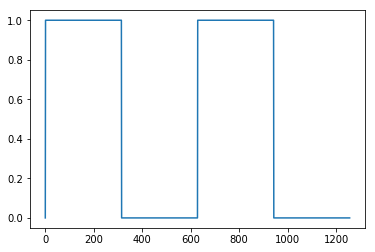

In [4]:
plt.plot(x)

In [5]:
filt = np.array([1, 1, 0])
#filt = np.array([1, 0, 0])

filt = filt - filt.mean()

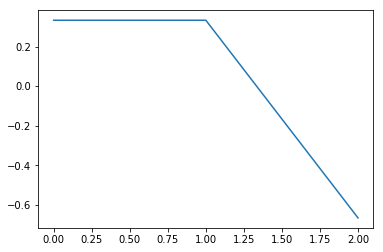

In [6]:
plt.plot(filt)

In [7]:
conv = np.zeros(x.shape[0])

In [8]:
conv.shape

(1257,)

In [9]:
conv = np.zeros(x.shape[0])
for ii in range(1, conv.shape[0]-1):
    conv[ii] += np.sum(x[ii-1:ii+2] * filt)

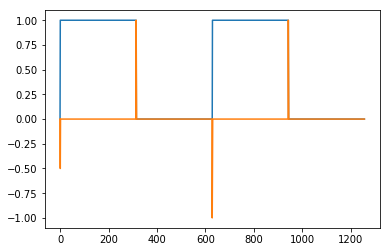

In [10]:
plt.plot(x / x.max())
plt.plot(conv / conv.max())

In [11]:
x = np.sin(t)

In [12]:
conv = np.zeros(x.shape[0])
for ii in range(1, conv.shape[0]-1):
    conv[ii] += np.sum(x[ii-1:ii+2]  * filt)

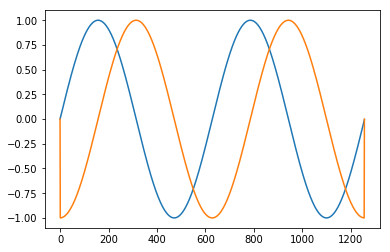

In [13]:
plt.plot(x / x.max())
plt.plot(conv / conv.max())

In [14]:
def plot_with_annot(im):
    fig, ax = plt.subplots(1)
    sns.heatmap(im, annot=True, ax=ax, cbar=False, cmap='gray_r', vmax=40)
    plt.axis("off")
    ax.set_aspect("equal")
    return fig

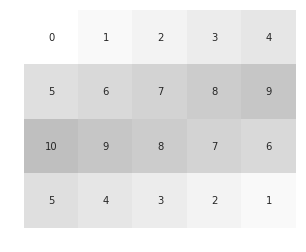

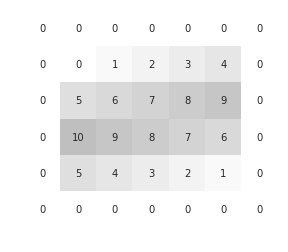

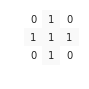

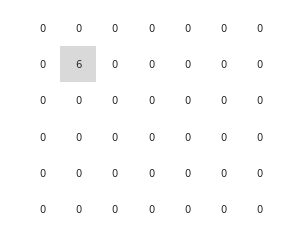

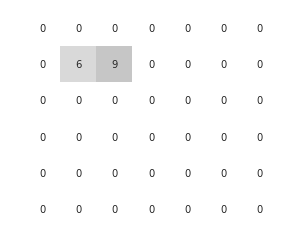

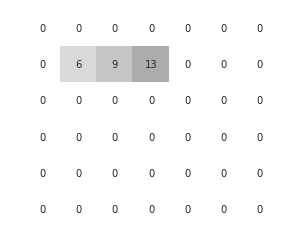

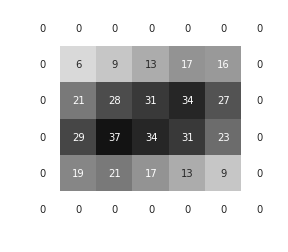

In [15]:
small_image = np.concatenate([np.arange(10), np.arange(10, 0, -1)]).reshape((4, 5))

fig1 = plot_with_annot(small_image)

small_image = np.pad(small_image, 1, 'constant')
fig1 = plot_with_annot(small_image)

kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

fig2 = plot_with_annot(kernel) 
fig2.set_size_inches([1, 1])

result = np.zeros(small_image.shape)

result[1, 1] += np.sum(small_image[:3, :3] * kernel)
fig3 = plot_with_annot(result)

result[1, 2] += np.sum(small_image[:3, 1:4] * kernel)
fig3 = plot_with_annot(result)

result[1, 3] += np.sum(small_image[:3, 2:5] * kernel)
fig3 = plot_with_annot(result)

result = np.zeros(small_image.shape)

for ii in range(small_image.shape[0]-2):
    for jj in range(small_image.shape[1]-2):
        result[ii+1, jj+1] = np.sum(small_image[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)

_ = plot_with_annot(result)

In [16]:
# Local maximum:
#kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
# Horizontal edge:
kernel = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])
# Vertical edge:
#kernel = np.array([[-1, 1, -1], [-1, 1, -1], [-1, 1, -1]])
# Horizontal gradient:
#kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
# Vertical gradient:
#kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
# diagonal gradient: 
# kernel = np.array([[1, -1, -1], [-1, 1, -1], [-1, -1, 1]])

kernel = kernel - kernel.mean()

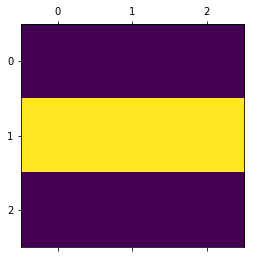

In [17]:
plt.matshow(kernel)

In [18]:
bricks = imread('./bricks.png')

In [19]:
bricks.shape

(159, 240, 4)

In [20]:
im = imread('./bricks.png')

In [21]:
im = np.sum(im, -1) 

In [22]:
im = np.pad(im, 1, 'constant', constant_values=0)

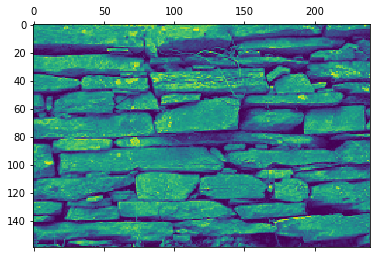

In [23]:
plt.matshow(im[1:-1, 1:-1])

In [24]:
conv = np.zeros(im.shape)

In [25]:
# for ii in range(1, im.shape[0]-2):
#     for jj in range(1, im.shape[1]-2):
#         conv[ii, jj] += np.sum(im[ii:ii + kernel.shape[0], jj:jj + kernel.shape[1]] * kernel)

for ii in range(1, im.shape[0]-2):
    for jj in range(1, im.shape[1]-2):
        conv[ii, jj] = np.sum(im[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)


In [26]:
bricks.shape

(159, 240, 4)

In [27]:
conv.shape

(161, 242)

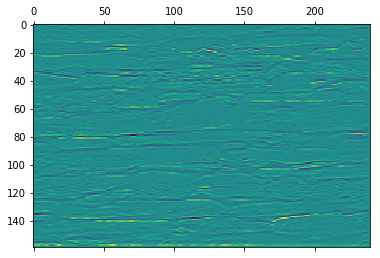

In [28]:
plt.matshow(conv[1:-1, 1:-1])

In [29]:
variable = ["shoe", "shirt", "shoe", "shirt", "pants", "pants", "pants"]

n_categories = np.unique(variable).shape[0]


In [30]:
categories = np.unique(variable)
n_categories = categories.shape[0]
ohe_variable = np.zeros((len(variable), n_categories))

for ii in range(len(variable)):
  jj = np.where(categories == variable[ii])
  ohe_variable[ii, jj] = 1


In [31]:
ohe_variable

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [32]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = [3.0, 1.0, 0.2]
print(softmax(scores))

[0.8360188  0.11314284 0.05083836]
